In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

# Ejercicio 2
Realiza las tareas de preprocesado y adecuación del Dataset que disponemos en el repositorio de GitHub  PRE-PROCESSING-FECHA con el objetivo de prepararlo y trabajarlo como dataframe para extraer información.

In [13]:
movie = 'movies.dat'

In [14]:
with open(movie, 'r', encoding='latin-1') as archivo:
    lineas = archivo.readlines()
datos = [linea.strip().split('::') for linea in lineas]
columnas = ['ID', 'Titulo', 'Genero']
df = pd.DataFrame(datos, columns=columnas)

In [15]:
df

,ID,Titulo,Genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


Primero declare 'movie.dat' como movie para que fuera más corto al momento de escribir codigo. Despues leemos el archivo, dividimos los datos y declaramos las columnas para finalmente convertirlo a un dataframe. 

In [16]:
df[['Pelicula', 'Año']] = df['Titulo'].str.rsplit('(', n=1, expand=True)
df['Año'] = df['Año'].str.rstrip(')')

df['Genero'] = df['Genero'].apply(lambda x: re.search(r'\b(\w+)\b', x).group(1) if re.search(r'\b(\w+)\b', x) else None)

Lo que sigue es acomodar los datos de la forma que queremos, lo primero que hacemos es dividir 'Titulo' en 'Pelicula' y 'Año' aprovechado sus parentesis para separarlos.

Solo queremos un 'Genero' así que aprobechamos la función regex para separarlos y despues nos quedamos únicamente con el primero.

In [17]:
df[df['Pelicula'].isnull()]

,ID,Titulo,Genero,Pelicula,Año


In [18]:
df[df['Año'].isnull()]

,ID,Titulo,Genero,Pelicula,Año


In [19]:
df[df['Genero'].isnull()]

,ID,Titulo,Genero,Pelicula,Año


Antes de seguir verifico que no hayan nulls en las columnas que planeo conservar, y como pueden ver no.

In [20]:
df

,ID,Titulo,Genero,Pelicula,Año
0,1,Toy Story (1995),Animation,Toy Story,1995
1,2,Jumanji (1995),Adventure,Jumanji,1995
2,3,Grumpier Old Men (1995),Comedy,Grumpier Old Men,1995
3,4,Waiting to Exhale (1995),Comedy,Waiting to Exhale,1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995
...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,Meet the Parents,2000
3879,3949,Requiem for a Dream (2000),Drama,Requiem for a Dream,2000
3880,3950,Tigerland (2000),Drama,Tigerland,2000
3881,3951,Two Family House (2000),Drama,Two Family House,2000


In [24]:
df = df.drop('Titulo', axis=1)
df = df.drop('ID', axis=1)

Por último borramos tanto 'Titulo' como 'ID' porque esos datos no son relevantes.

In [25]:
df

,Genero,Pelicula,Año
0,Animation,Toy Story,1995
1,Adventure,Jumanji,1995
2,Comedy,Grumpier Old Men,1995
3,Comedy,Waiting to Exhale,1995
4,Comedy,Father of the Bride Part II,1995
...,...,...,...
3878,Comedy,Meet the Parents,2000
3879,Drama,Requiem for a Dream,2000
3880,Drama,Tigerland,2000
3881,Drama,Two Family House,2000


In [26]:
df.insert(2, 'Genero', df.pop('Genero'))

In [27]:
df['Año'] = pd.to_numeric(df['Año'], errors='coerce')

Como ven en la tabla de arriba 'Genero' es la primera columna y eso a mí no me gusta así que agrego y elimino la columna para basicamente moverla al final.

Tambien decidi convertir Año a numerico pensando en la creación de las gráficas, aunque al final fue innecesario.

In [28]:
df

,Pelicula,Año,Genero
0,Toy Story,1995,Animation
1,Jumanji,1995,Adventure
2,Grumpier Old Men,1995,Comedy
3,Waiting to Exhale,1995,Comedy
4,Father of the Bride Part II,1995,Comedy
...,...,...,...
3878,Meet the Parents,2000,Comedy
3879,Requiem for a Dream,2000,Drama
3880,Tigerland,2000,Drama
3881,Two Family House,2000,Drama


# Ejercicio 3
Muestra tu creatividad. ¿Qué crees relevante mostrar del Dataset " movies.dat " del ejercicio anterior?

Realiza una o dos representaciones gráficas y justifica tu elección.

In [29]:
muestra = (df[df['Año'] == 2000])

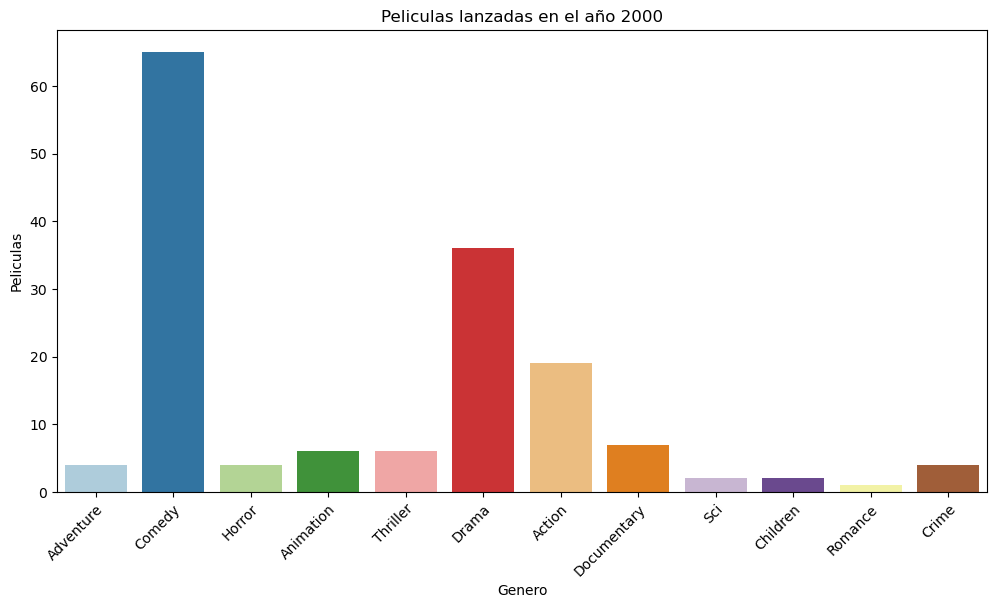

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Genero', data=muestra, palette='Paired')
plt.xlabel('Genero')
plt.ylabel('Peliculas')
plt.title('Peliculas lanzadas en el año 2000')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

Esta primera gráfica muestra los generos de las peliculas únicamente del año 2000. Útil si quieres checar las tendencias más recientes. 

Lo más notorio es la enorme columna de comedia que tenemos, seguido por drama con poco más de la mitad de comedia y acción con alrededor de 20. Las peliculas de romance, ciencia ficción y para niños apenas fueron tocadas. Las demas giran alrededor de las 5 peliculas.

Text(0.5, 0, 'Año')

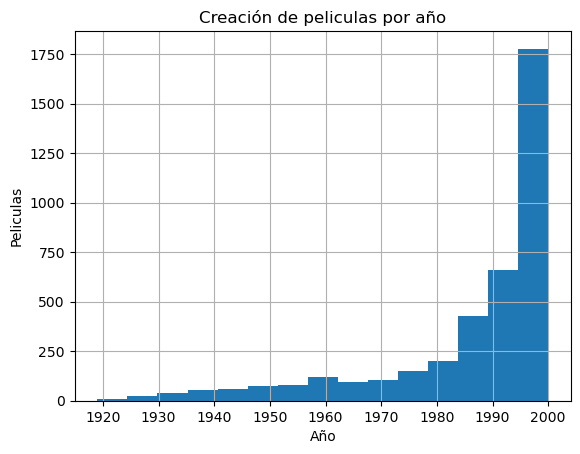

In [31]:
df.hist(['Año'], bins=15)
plt.title('Creación de peliculas por año')
plt.ylabel('Peliculas')
plt.xlabel('Año')

El histograma presentado muestra las peliculas creadas durante los años de 1920 a 2000.

Vemos como periodicamente fueron siendo creadas cada vez más peliculas, en 1960 hubo un pico aunque volvio a bajar, y finalmente entre los años 1980 a 2000 se dispararon la creación de peliculas.

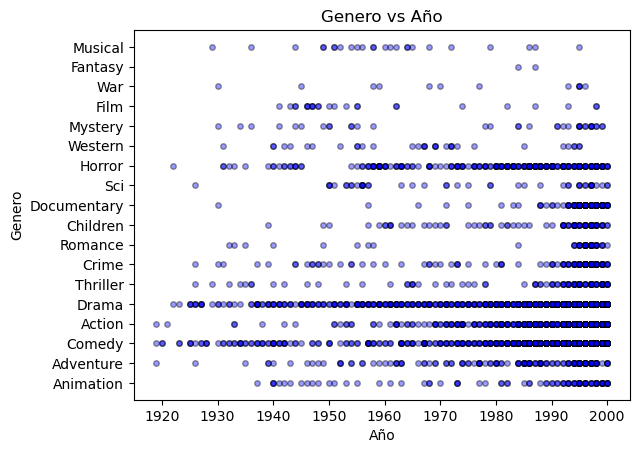

In [33]:
x = df.Año
y = df.Genero
colors = 'Blue'
area = np.pi*5

plt.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')

plt.title('Genero vs Año')
plt.ylabel('Genero')
plt.xlabel('Año')
plt.show()

Aquí vemos una comparación de generos con los años de lanzamiento. Cabe resaltar que se utilizo alpha=0.4 para poder ver que donde hay puntos más oscuros es que hay más de una pelicula con esa caracteristica mientras que los puntos más claros significa que solo hubo una.

Lo primero que note es que tal y como mostro el histograma, en los últimos años hay mayor cantidad de peliculas, pero despues de eso hay muchas otras conclusiones que podemos sacar.

La comedia y el drama son generos que siempre fueron populares y nunca bajaron, los generos de acción, animación, entre otras tuvieron una mayor popularidad durante los últimos años aunque podria tambien deberse a la mayor producción de peliculas en general, y otras como Musical o Film-Noir tuvieron una epoca de oro pero perdieron relevancia con el tiempo.

## Acomodar codigo, ser más especifico en las explicaciones y usar ReGex 